###Libraries you'll likely need

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

###Importing data

In [69]:
income94 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None, sep = ', ')
income94.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


## Initial Data Exploration
###1.

In [70]:
# Dataframe variable summary
income94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           32561 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          32561 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      32561 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [71]:
income94.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


###2.

In [72]:
# See count of missing values for variable workclass
income94.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [73]:
# Replace all missing values marked by "?" with NaN
income94 = income94.replace('?', np.nan)

In [74]:
# Check observation count for each variable to determine how many were NaN
income94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           30725 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          30718 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      31978 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


###3.

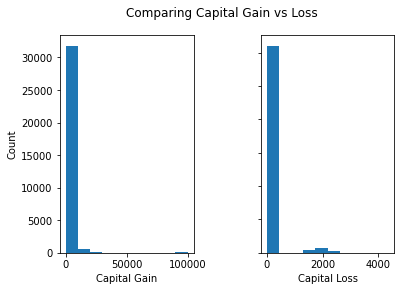

In [75]:
fig, (plt1, plt2) = plt.subplots(1, 2)
fig.suptitle('Comparing Capital Gain vs Loss')
plt. subplots_adjust(wspace=0.5)
plt1.hist(income94.capital_gain) # Plot histogram for capital gain
plt2.hist(income94.capital_loss)
 # Plot histogram for capital loss
fig.show()
fig.get_axes()[0].set(xlabel='Capital Gain', ylabel='Count')
fig.get_axes()[1].set(xlabel='Capital Loss')
for ax in fig.get_axes():
    ax.label_outer()

In [76]:
# Transforming capital gain to a binary variable with values 0 for (gain = 0) and 1 for (gain > 0)
income94['cg_bin'] = (income94.capital_gain > 0).astype(int)
income94.cg_bin.value_counts()

0    29849
1     2712
Name: cg_bin, dtype: int64

In [77]:
# Transforming capital loss to a binary variable with values 0 for (loss = 0) and 1 for (loss > 0)
income94['cl_bin'] = (income94.capital_loss > 0).astype(int)
income94.cl_bin.value_counts()

0    31042
1     1519
Name: cl_bin, dtype: int64

##4.

Text(0, 0.5, 'Count')

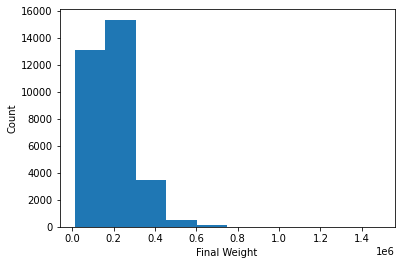

In [78]:
# Plot histogram to observe fnlwgt distribution
plt.hist(income94.fnlwgt)
plt.xlabel('Final Weight')
plt.ylabel('Count')

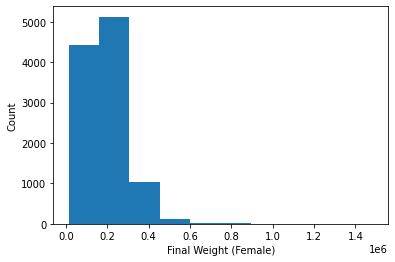

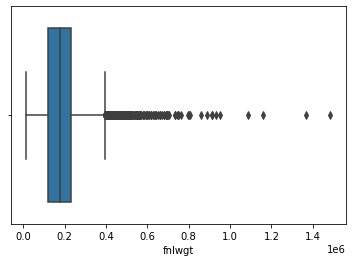

In [79]:
# Examine distribution of fnlwgt for female subjects
wgt_f = income94[income94.sex == 'Female']
plt.hist(income94.fnlwgt[income94.sex == 'Female'])
plt.xlabel('Final Weight (Female)')
plt.ylabel('Count')
plt.show()
sns.boxplot(x = 'fnlwgt', data = wgt_f)

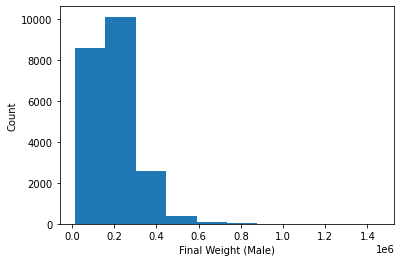

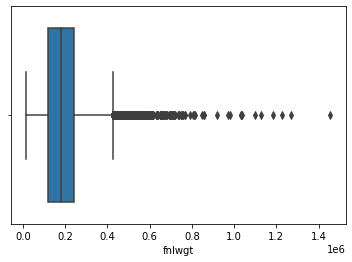

In [80]:
# Examine distribution of fnlwgt for male subjects
wgt_m = income94[income94.sex == 'Male']
plt.hist(income94.fnlwgt[income94.sex == 'Male'])
plt.xlabel('Final Weight (Male)')
plt.ylabel('Count')
plt.show()
sns.boxplot(x = 'fnlwgt', data = wgt_m)

##Correlation
###1a.

In [81]:
# Observe correlation values for all variable pairs in income94
income94.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,cg_bin,cl_bin
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.120095,0.050537
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.004849,-0.008981
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.115444,0.076386
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.484101,-0.032279
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,-0.065307,0.979431
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.075016,0.050439
cg_bin,0.120095,-0.004849,0.115444,0.484101,-0.065307,0.075016,1.000000,-0.066678
cl_bin,0.050537,-0.008981,0.076386,-0.032279,0.979431,0.050439,-0.066678,1.000000


###1b.

In [82]:
# Fit linear regression model on independent variable education_num and dependent variable hours_per_week
reg1 = smf.ols('hours_per_week ~ education_num', data = income94).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     730.4
Date:                Mon, 08 Feb 2021   Prob (F-statistic):          4.24e-159
Time:                        08:17:01   Log-Likelihood:            -1.2768e+05
No. Observations:               32561   AIC:                         2.554e+05
Df Residuals:                   32559   BIC:                         2.554e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        33.2711      0.274    121.575

###1c.

In [83]:
# Get correlation value for education_num and age for females
income94[income94.sex == 'Female'].education_num.corr(income94.age)

-0.017899243935447715

In [84]:
# Get correlation value for education_num and age for males
income94[income94.sex == 'Male'].education_num.corr(income94.age)

0.06048640919826827

###1d.

In [85]:
# Unweighted
print('The unweighted variance for education_num is {}'.format(np.var(income94.education_num)))
print('The unweighted variance for hours_per_week is {}'.format(np.var(income94.hours_per_week)))
print('The unweighted covariance between these two variables is {}'.format(np.cov(income94.education_num, income94.hours_per_week)[0][1]))

The unweighted variance for education_num is 6.618686630416274
The unweighted variance for hours_per_week is 152.45431279266475
The unweighted covariance between these two variables is 4.705337944611544


In [86]:
# Weighted
income94['weighted_edu_num'] = income94.education_num * income94.fnlwgt
income94['weighted_hours'] = income94.hours_per_week * income94.fnlwgt
print('The weighted variance for education_num is {}'.format(np.var(income94.weighted_edu_num)))
print('The weighted variance for hours_per_week is {}'.format(np.var(income94.weighted_hours)))
print('The weighted covariance between these two variables is {}'.format(np.cov(income94.weighted_edu_num, income94.weighted_hours)[0][1]))

The weighted variance for education_num is 1390210683845.4873
The weighted variance for hours_per_week is 24505426809320.75
The weighted covariance between these two variables is 4558904127558.021


##Regression
###1a.

In [87]:
reg2 = smf.ols('hours_per_week ~ sex', data = income94).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1807.
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        08:17:01   Log-Likelihood:            -1.2716e+05
No. Observations:               32561   AIC:                         2.543e+05
Df Residuals:                   32559   BIC:                         2.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      36.4104      0.116    314.412      

###1b.

In [88]:
reg3 = smf.ols('hours_per_week ~ sex + education_num', data = income94).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1295.
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        08:17:02   Log-Likelihood:            -1.2680e+05
No. Observations:               32561   AIC:                         2.536e+05
Df Residuals:                   32558   BIC:                         2.536e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        29.4106      0.281    104.556

###1c.

In [89]:
reg4 = smf.ols('hours_per_week ~ sex + education_num + gross_income_group', data = income94).fit()
print(reg4.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1130.
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        08:17:02   Log-Likelihood:            -1.2643e+05
No. Observations:               32561   AIC:                         2.529e+05
Df Residuals:                   32557   BIC:                         2.529e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           